In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


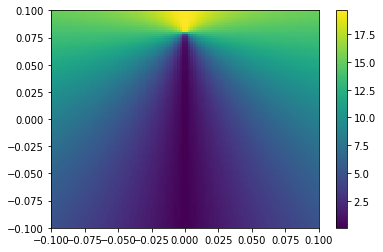

In [2]:
betaA_tilde = 4.32
betaO_tilde = 11.4
betaK = 13.9
delta = 0.1

betaA = betaA_tilde - delta * betaO_tilde
betaO = betaO_tilde

def HqTA(k,qx, qy):
    thetaq = arctan2(qy, qx)
    thetak = arctan2(k[1],k[0])
    thetakq = arctan2(k[1] + qy, k[0] + qx)
    
    return betaA * abs(sqrt(qx**2 + qy**2) * sin(2 * thetaq + (thetakq + thetak)/2.))



def HqLO_intra(k, qx, qy):
    thetaq = arctan2(qy, qx)
    thetak = arctan2(k[1],k[0])
    thetakq = arctan2(k[1] + qy, k[0] + qx)

    return betaO * abs( sin(thetaq - 0.5 * (thetakq + thetak)))

def HqTO_intra(k, qx, qy):
    thetaq = arctan2(qy, qx)
    thetak = arctan2(k[1],k[0])
    thetakq = arctan2(k[1] + qy, k[0] + qx)

    return betaO * abs( cos(thetaq - 0.5 * (thetakq + thetak)))

def HqTO_inter(k,qx,qy):
    return HqLO_intra(k,qx,qy)

def HqLO_inter(k,qx,qy):
    return HqTO_intra(k,qx,qy)


def HqAK_intra(k, qx, qy):
    thetaq = arctan2(qy, qx)
    thetak = arctan2(k[1],k[0])
    thetakq = arctan2(k[1] + qy, k[0] + qx)

    return betaK * sqrt(2.) * abs( sin(0.5 * (thetakq - thetak)))

def HqAK_inter(k, qx, qy):
    thetaq = arctan2(qy, qx)
    thetak = arctan2(k[1],k[0])
    thetakq = arctan2(k[1] + qy, k[0] + qx)

    return betaK * sqrt(2.) * abs( cos(0.5 * (thetakq - thetak)))

    
def trial():
    k = [0.00,-0.08]
    
    qax = linspace(-0.1,0.1,100)
    [qx, qy] = meshgrid(qax, qax)
    
    HH = HqAK_intra(k, qx, qy)
    
    fig, ax = subplots()
    pp=ax.pcolorfast(qax, qax, HH)
    fig.colorbar(pp)
    
trial()


100


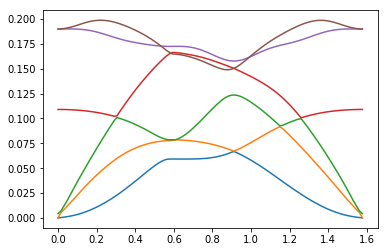

In [4]:
def read_modes(nmodes, filename,scalar=1):
    data = genfromtxt(filename)
    qax = data[:,0]
    
    print(len(qax))
    
    phmodes = data[:,1:nmodes+1]*123.98419/1e6*scalar
    
    fig, ax = subplots()
    for i in range(nmodes):
        ax.plot(qax, phmodes[:,i])

    return qax, phmodes
    
(qax, phmodes) = read_modes(2*3,"../orgbands.dat",1.0)

0.5 0.2886751 [1.         0.57735027]
100
K= 0.33333 0.5773445
0.5773502691896258


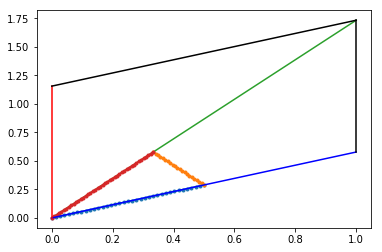

In [6]:
#b1 = (1,1/Ô3)2pi/b and bú2 = (0,2/Ô3)2fi/b

def read_qs(filename):
    
    b1 = array([1,1./sqrt(3.)])
    b2 = array([0,2./sqrt(3.)])
    b12 = b1 + b2
    
    (qx,qy) = genfromtxt(filename, unpack=True, usecols=[0,1])
    fig, ax = subplots()
    iM = 36
    print(qx[iM],qy[iM],b1)
    ax.plot(qx[0:iM+1],qy[0:iM+1],'.-')
    iK = 57

    ax.plot(qx[iM:iK+1],qy[iM:iK+1],'.-')
    #b2rot = array([b2[0]*cos(pi/6)+b2[1]*sin(pi/6),-b2[0]*sin(pi/6)+b2[1]*cos(pi/6)])
    #b2rot = b12
    ax.plot([0,b12[0]],[0,b12[1]])
    
    ax.plot(qx[iK:],qy[iK:],'.-')
    
    
    ax.plot([0,b1[0]],[0,b1[1]],'b')
    ax.plot([0,b2[0]],[0,b2[1]],'r')
    ax.plot([b1[0],b12[0]],[b1[1],b12[1]],'k')
    ax.plot([b2[0],b12[0]],[b2[1],b12[1]],'k')
    print(len(qx))
    
    qcut = {}
    qcut['qx']=qx
    qcut['qy']=qy
    qcut['iM'] = iM
    qcut['iK'] = iK
    print("K=",qx[iK],qy[iK])
    print(1/sqrt(3.))
    return qcut
    
qcut = read_qs("qlist.dat")


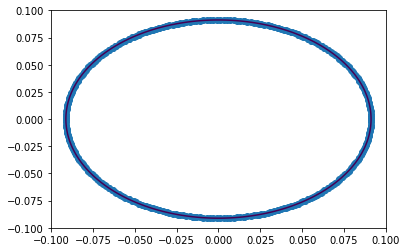

In [7]:
vF = 6.582  #(1e6 m/s * hbar)
K = array([1/3.,1/sqrt(3.)])
Kp = -K

# Get list of k points given an energy
def get_k_locus(EN, ax=None):
    if ax==None:
        fig, ax = subplots()
    kax = linspace(-0.1,0.1,100)
    kx, ky = meshgrid(kax,kax)
    ek = vF * sqrt(kx**2 + ky**2)
    CS=ax.contour(kax, kax, ek, [EN])
    paths=CS.collections[0].get_paths()
    path0=paths[0]
    xy=path0.vertices
    ax.scatter(xy[:,0], xy[:,1])
    return xy

fig, ax = subplots()
#ax.set_visible(False)
en_kpoints = get_k_locus(0.6, ax)

In [8]:
# Given a q point, the locus of origin k points at 0.6 eV, and an energy: find the locus of k' points
# We have k and kp.  k-kp should be q, thus kp = k + q. So, look for the intersection of k+q and kp or k and kp-q

def find_intersection(qx, qy, omega, k_origin, ax=None):
    
    Nk1 = len(k_origin[:,0])
    
    if ax == None:
        fig, ax = subplots()
    kppoints = get_k_locus(0.6-omega,ax)
    Nk2 = len(kppoints[:,0])
    
    kppoints[:,0] -= qx
    kppoints[:,1] -= qy
    ax.scatter(k_origin[:,0], k_origin[:,1],marker='x')
    ax.scatter(kppoints[:,0], kppoints[:,1],marker='x')
    
    # Form array of differences
    # Do this arpes-style
    Nk_arpes = 100

    kax = linspace(-0.2,0.2,Nk_arpes)

    [xx,yy] = meshgrid(kax,kax)
    eta = 0.002
    intersection1 = zeros_like(xx)
    intersection2 = zeros_like(xx)
    for i in range(Nk1):
        intersection1 += eta / ((xx-k_origin[i,0])**2 + (yy-k_origin[i,1])**2 + eta**2)
    for i in range(Nk2):
        intersection2 += eta / ((xx-kppoints[i,0])**2 + (yy-kppoints[i,1])**2 + eta**2)
        
    intersection1 /= Nk_arpes * pi * Nk1
    intersection2 /= Nk_arpes * pi * Nk2
    
    #fig, ax = subplots()
    #ax.pcolorfast(intersection1*intersection2)
    
    return (intersection1*intersection2).sum()
    
    

iq = 5
find_intersection(qcut['qx'][iq], qcut['qy'][iq], phmodes[iq,5], en_kpoints, ax)


0.021042403056754828

1.9556467322957425

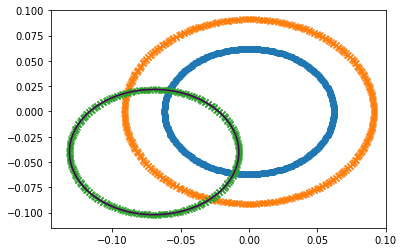

In [9]:
# Given a q point, the locus of origin k points at 0.6 eV, and an energy: find the locus of k' points
# We have k and kp.  k-kp should be q, thus kp = k + q. So, look for the intersection of k+q and kp or k and kp-q

def find_intersection_with_gkq(gkq_fcn,qx, qy, omega, k_origin, ax=None):
    
    Nk1 = len(k_origin[:,0])
    
    if ax == None:
        fig, ax = subplots()
    kppoints = get_k_locus(0.6-omega,ax)
    Nk2 = len(kppoints[:,0])
    
    kppoints[:,0] -= qx
    kppoints[:,1] -= qy
    ax.scatter(k_origin[:,0], k_origin[:,1],marker='x')
    ax.scatter(kppoints[:,0], kppoints[:,1],marker='x')
    
    # Form array of differences
    # Do this arpes-style
    Nk_arpes = 100
    kax = linspace(-0.2,0.2,Nk_arpes)

    [xx,yy] = meshgrid(kax,kax)
    eta = 0.002
    intersection1 = zeros_like(xx)
    intersection2 = zeros_like(xx)
    for i in range(Nk1):
        intersection1 += gkq_fcn(k_origin[i,:],qx,qy)**2  * eta / ((xx-k_origin[i,0])**2 + (yy-k_origin[i,1])**2 + eta**2)
    for i in range(Nk2):
        intersection2 += eta / ((xx-kppoints[i,0])**2 + (yy-kppoints[i,1])**2 + eta**2)
        
    intersection1 /= Nk_arpes * pi * Nk1
    intersection2 /= Nk_arpes * pi * Nk2
    

    
    #fig, ax = subplots()
    #ax.pcolorfast(intersection1)
    
    return (intersection1*intersection2).sum()
    
fig, ax = subplots()
find_intersection_with_gkq(HqLO_intra,qcut['qx'][iq], qcut['qy'][iq], phmodes[iq,5], en_kpoints, ax)


2.118750532502047 2.0822423248485262


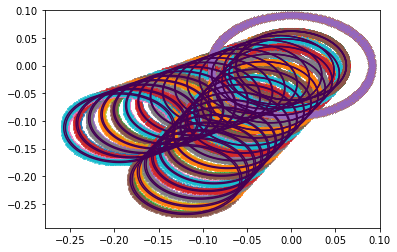

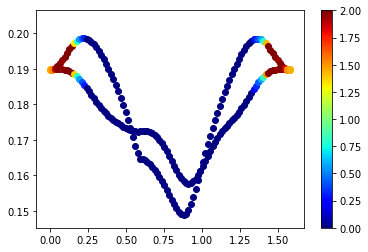

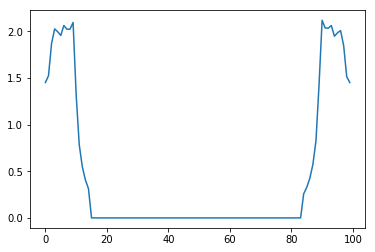

In [10]:
gkq_LO = zeros(100)
gkq_TO = zeros(100)

fig, ax = subplots()
for iq in range(0,15):
    gkq_LO[iq] = find_intersection_with_gkq(HqLO_intra,qcut['qx'][iq], qcut['qy'][iq], phmodes[iq,5], en_kpoints, ax)
    gkq_TO[iq] = find_intersection_with_gkq(HqLO_intra,qcut['qx'][iq], qcut['qy'][iq], phmodes[iq,4], en_kpoints, ax)
    
for iq in range(100-16,100):
    gkq_LO[iq] = find_intersection_with_gkq(HqLO_intra,qcut['qx'][iq], qcut['qy'][iq], phmodes[iq,5], en_kpoints, ax)
    gkq_TO[iq] = find_intersection_with_gkq(HqLO_intra,qcut['qx'][iq], qcut['qy'][iq], phmodes[iq,4], en_kpoints, ax)
    

print(gkq_LO.max(), gkq_TO.max())
fig, ax = subplots()
for iq in range(0,100):
    _=ax.scatter(qax[iq], phmodes[iq,5],c=gkq_LO[iq], cmap=cm.jet, vmin=0, vmax=2)
    _=ax.scatter(qax[iq], phmodes[iq,4],c=gkq_TO[iq], cmap=cm.jet, vmin=0, vmax=2)
fig.colorbar(_)
fig, ax = subplots()
ax.plot(gkq_LO)

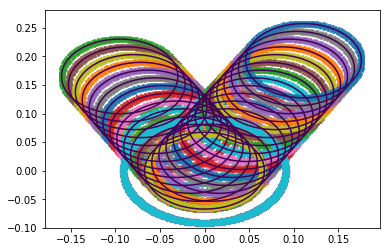

In [14]:
fig, ax = subplots()
gkq_AK = zeros(100)
for iq in range(45,72):
    gkq_AK[iq] = find_intersection_with_gkq(HqAK_intra,qcut['qx'][iq]-K[0], qcut['qy'][iq]-K[1], phmodes[iq,4], en_kpoints, ax)
    #print(phmodes[iq,[3,4,5]])
#fig, ax = subplots()
#ax.plot(gkq_AK)

2.118750532502047 2.0822423248485262 4.546009260397927


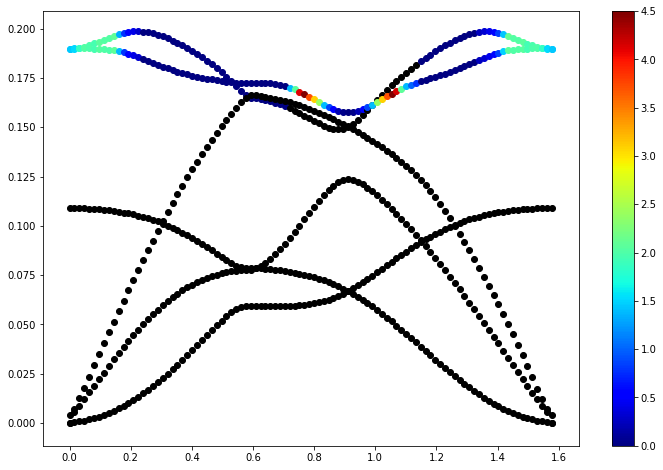

In [17]:
print(gkq_LO.max(), gkq_TO.max(),gkq_AK.max())
fig, ax = subplots(figsize=(12,8))
for iq in range(0,45):
    _=ax.scatter(qax[iq], phmodes[iq,5],c=gkq_LO[iq], cmap=cm.jet, vmin=0, vmax=4.5)
    _=ax.scatter(qax[iq], phmodes[iq,4],c=gkq_TO[iq], cmap=cm.jet, vmin=0, vmax=4.5)
for iq in range(45,72):
    ax.scatter(qax[iq], phmodes[iq,5],c='black', cmap=cm.jet, vmin=0, vmax=4.5)
    _=ax.scatter(qax[iq], phmodes[iq,4],c=gkq_AK[iq], cmap=cm.jet, vmin=0, vmax=4.5)
for iq in range(72,100):
    _=ax.scatter(qax[iq], phmodes[iq,5],c=gkq_LO[iq], cmap=cm.jet, vmin=0, vmax=4.5)
    _=ax.scatter(qax[iq], phmodes[iq,4],c=gkq_TO[iq], cmap=cm.jet, vmin=0, vmax=4.5)
for iq in range(0,100):
    for ib in range(4):
        ax.scatter(qax[iq], phmodes[iq, ib], c='black', cmap=cm.jet, vmin=0, vmax=4.5)
fig.colorbar(_)

savetxt("phmodes.dat", phmodes)
savetxt("gkq_LO.dat", gkq_LO)
savetxt("gkq_TO.dat", gkq_TO)
savetxt("gkq_AK.dat", gkq_AK)